In [32]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['voice.csv']


In [33]:
data = pd .read_csv('../input/voice.csv')

In [34]:
data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
meanfreq    3168 non-null float64
sd          3168 non-null float64
median      3168 non-null float64
Q25         3168 non-null float64
Q75         3168 non-null float64
IQR         3168 non-null float64
skew        3168 non-null float64
kurt        3168 non-null float64
sp.ent      3168 non-null float64
sfm         3168 non-null float64
mode        3168 non-null float64
centroid    3168 non-null float64
meanfun     3168 non-null float64
minfun      3168 non-null float64
maxfun      3168 non-null float64
meandom     3168 non-null float64
mindom      3168 non-null float64
maxdom      3168 non-null float64
dfrange     3168 non-null float64
modindx     3168 non-null float64
label       3168 non-null object
dtypes: float64(20), object(1)
memory usage: 519.8+ KB


We need to change label values from "male" and "female" to "1" and "0".
After that we will normalize other numeric values. For example "meanfreq" has 0 to 1 values but "kurt" has 1025 or 5. If we don't normalize this datas, our algorithm can be broken.

In [36]:
data.label = [1 if i == "male" else 0 for i in data.label]    #changing "label" values
y = data.label.values
x_data = data.drop(["label"], axis=1)
x = ((x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data))).values    #normalization

Detecting train and test datasets.

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

x_train = x_train.T
x_test = x_test.T
y_train = y_train.T
y_test = y_test.T

"initialize_w_and_b(dimension)" function is define for first values of weight and bias.

In [38]:
def initialize_w_and_b(dimension):
    w = np.full((dimension,1), 0.01)
    b = 0.0
    return w, b

Sigmoid function is returning our z value in 0 to 1.

In [39]:
def sigmoid(z):
    y_head = 1 / (1+np.exp(-z))
    return y_head

A function for forward and backward propagation process.

In [40]:
def forward_backward_propagation(w, b, x_train, y_train):
    z = np.dot(w.T, x_train) + b
    y_head = sigmoid(z)
    loss = -((1-y_train)*np.log(1-y_head))-(y_train*np.log(y_head))
    cost = (np.sum(loss)) / x_train.shape[1]
    
    derivative_weight = (np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1]
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]
    gradients = {"derivative_weight": derivative_weight, "derivative_bias": derivative_bias}
    return cost, gradients

Update function for updating weight and bias values with train datas.

In [41]:
def update(w, b, x_train, y_train, learning_rate, num_iterations):
    cost_list = []
    cost_list2 = []
    index = []
    
    for i in range(num_iterations):
        cost, gradients = forward_backward_propagation(w, b, x_train, y_train)
        cost_list.append(cost)
        
        w = w - learning_rate * gradients["derivative_weight"]
        b = b- learning_rate * gradients["derivative_bias"]
        
        if i%10 == 0:
            cost_list2.append(cost)
            index.append(i)
            
    parameters = {"weight":w, "bias":b}
    plt.plot(index,cost_list2)
    plt.xticks(index,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, cost_list

Predict function for predict test values.

In [42]:
def predict(w, b, x_test):
    z = sigmoid(np.dot(w.T, x_test)+b)
    y_prediction = np.zeros((1, x_test.shape[1]))
    for i in range(z.shape[1]):
        if z[0,i] <= 0.5:
            y_prediction[0,i] = 0
        else:
            y_prediction[0,i] = 1
    return y_prediction

At last definition of logistic regression fucntion.

In [43]:
def logistic_regression(x_train, y_train, x_test, y_test, learning_rate, num_iterations):
    dimension = x_train.shape[0]
    w, b = initialize_w_and_b(dimension)
    parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate, num_iterations)
    y_prediction_test = predict(parameters["weight"], parameters["bias"], x_test)
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))

Applying logistic regression.

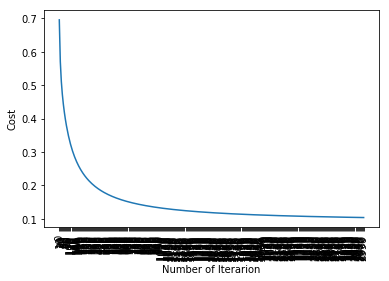

test accuracy: 98.10725552050474 %


In [44]:
logistic_regression(x_train, y_train, x_test, y_test, learning_rate=1, num_iterations=3000)

This method gives 98.11% accuracy with test values, this ratio is the max ratio possible.